In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
dataset = fetch_openml(data_id=42803, as_frame=True)

In [4]:
print(dir(dataset))

['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [5]:
print(dataset.target_names)

['Sex_of_Driver']


In [6]:
acc = dataset.frame

In [7]:
acc.shape

(363243, 67)

In [8]:
pd.value_counts(acc.dtypes)

float64    61
object      6
dtype: int64

In [9]:
obj_cols = acc.select_dtypes(exclude='number')

In [10]:
acc['Sex_of_Driver'] = acc['Sex_of_Driver'].astype('float')

In [11]:
obj_cols.head()

Accident_Index Sex_of_Driver        Date   Time Local_Authority_(Highway)  \
0  201501BS70001           1.0  12/01/2015  18:45                 E09000020   
1  201501BS70002           1.0  12/01/2015  07:50                 E09000020   
2  201501BS70004           1.0  12/01/2015  18:08                 E09000020   
3  201501BS70005           1.0  13/01/2015  07:40                 E09000020   
4  201501BS70008           1.0  09/01/2015  07:30                 E09000020   

  LSOA_of_Accident_Location  
0                 E01002825  
1                 E01002820  
2                 E01002833  
3                 E01002874  
4                 E01002814

In [12]:
acc.describe(exclude='number')

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          363243      319866  319822                    319866   
unique         140056         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2972                      8457   

       LSOA_of_Accident_Location  
count                     298758  
unique                     25979  
top                    E01028497  
freq                        1456

In [13]:
unique_values = acc.select_dtypes(include='number').nunique()
unique_values = unique_values.sort_values()

In [14]:
print(unique_values)

Urban_or_Rural_Area                                 2
Sex_of_Casualty                                     2
Was_Vehicle_Left_Hand_Drive?                        2
Did_Police_Officer_Attend_Scene_of_Accident         3
Casualty_Class                                      3
                                                ...  
1st_Road_Number                                  3938
Location_Easting_OSGR                           78609
Location_Northing_OSGR                          82205
Latitude                                       116292
Longitude                                      117588
Length: 62, dtype: int64


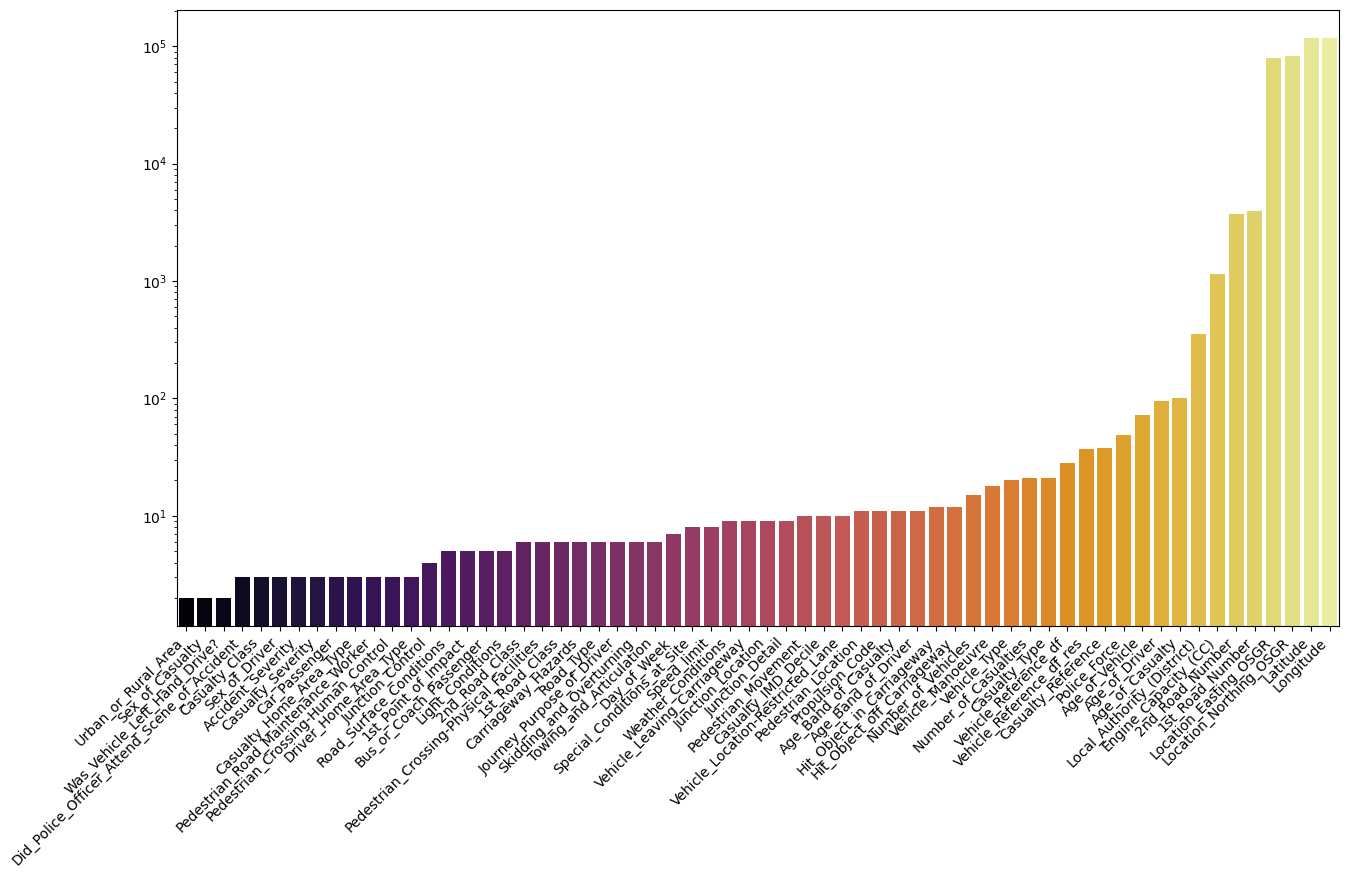

In [15]:
plt.figure(figsize=(15, 8))

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale('log')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [16]:
result = acc.info()

print(result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363243 entries, 0 to 363242
Data columns (total 67 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               363243 non-null  object 
 1   Vehicle_Reference_df_res                     363243 non-null  float64
 2   Vehicle_Type                                 363181 non-null  float64
 3   Towing_and_Articulation                      362864 non-null  float64
 4   Vehicle_Manoeuvre                            363059 non-null  float64
 5   Vehicle_Location-Restricted_Lane             363067 non-null  float64
 6   Junction_Location                            363159 non-null  float64
 7   Skidding_and_Overturning                     363067 non-null  float64
 8   Hit_Object_in_Carriageway                    363080 non-null  float64
 9   Vehicle_Leaving_Carriageway                  363084 non-nul

In [17]:
num_dups = acc.drop(labels=['Accident_Index'], axis=1).duplicated().sum()

print(f'There are {num_dups} accidents that have duplicate records')

There are 22 accidents that have duplicate records


In [18]:
columns = acc.drop(['Accident_Index'], axis=1).columns

acc.drop_duplicates(subset=columns, inplace=True)

In [19]:
acc.shape

(363221, 67)

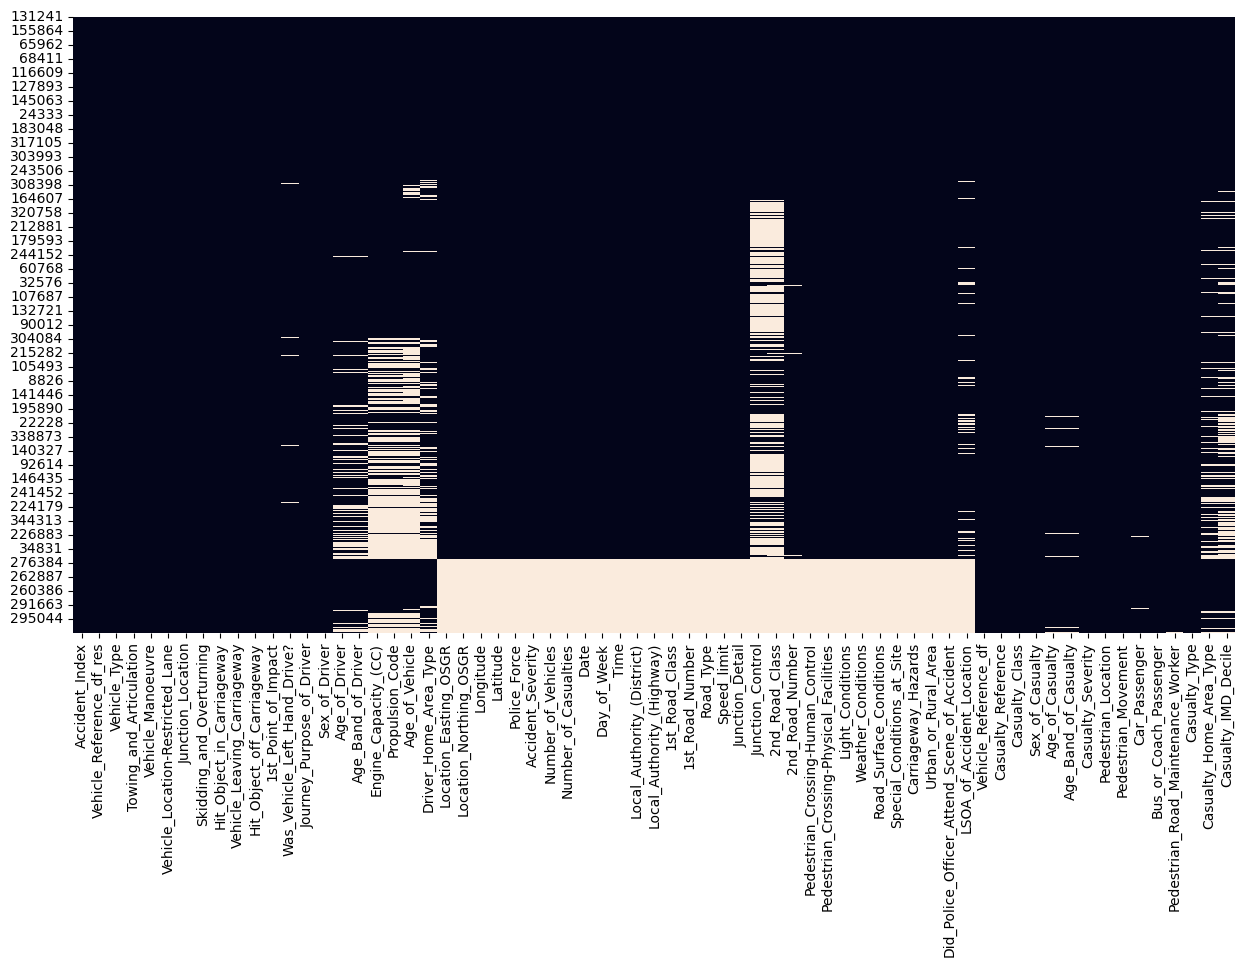

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(acc.loc[acc.isnull().sum(1).sort_values().index].isnull(), cbar=False)
plt.show()

In [21]:
threshhold = acc.shape[1] * 0.8

#print(threshhold)
acc = acc.dropna(thresh=threshhold, axis=0)

acc = acc.reset_index(drop=True)

In [22]:
acc.tail()

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
319785  2015984141415                      13.0           9.0   
319786  2015984141415                      13.0           9.0   
319787  2015984141415                      13.0           9.0   
319788  2015984141415                      13.0           9.0   
319789  2015984141415                      13.0           9.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
319785                      0.0               18.0   
319786                      0.0               18.0   
319787                      0.0               18.0   
319788                      0.0               18.0   
319789                      0.0               18.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
319785                               0.0                0.0   
319786                               0.0                0.0   
319787                               0.0                0.0   
319788                               0.0                0.0   
319789                               0.0                0.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
319785                       0.0                        0.0   
319786                       0.0                        0.0   
319787                       0.0                        0.0   
319788                       0.0                        0.0   
319789                       0.0                        0.0   

        Vehicle_Leaving_Carriageway  ...  Age_Band_of_Casualty  \
319785                          5.0  ...                   1.0   
319786                          5.0  ...                   5.0   
319787                          5.0  ...                   4.0   
319788                          5.0  ...                   6.0   
319789                          5.0  ...                   4.0   

        Casualty_Severity  Pedestrian_Location  Pedestrian_Movement  \
319785                3.0                  0.0                  0.0   
319786                3.0                  0.0                  0.0   
319787                3.0                  0.0                  0.0   
319788                3.0                  0.0                  0.0   
319789                3.0                  0.0                  0.0   

        Car_Passenger  Bus_or_Coach_Passenger  \
319785            2.0                     0.0   
319786            0.0                     0.0   
319787            0.0                     0.0   
319788            0.0                     0.0   
319789            0.0                     0.0   

        Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
319785                                 0.0            9.0   
319786                                 0.0            9.0   
319787                                 0.0            9.0   
319788                                 0.0            9.0   
319789                                 0.0            9.0   

        Casualty_Home_Area_Type  Casualty_IMD_Decile  
319785                      1.0                  NaN  
319786                      1.0                  2.0  
319787                      2.0                  5.0  
319788                      3.0                  NaN  
319789                      1.0                  4.0  

[5 rows x 67 columns]

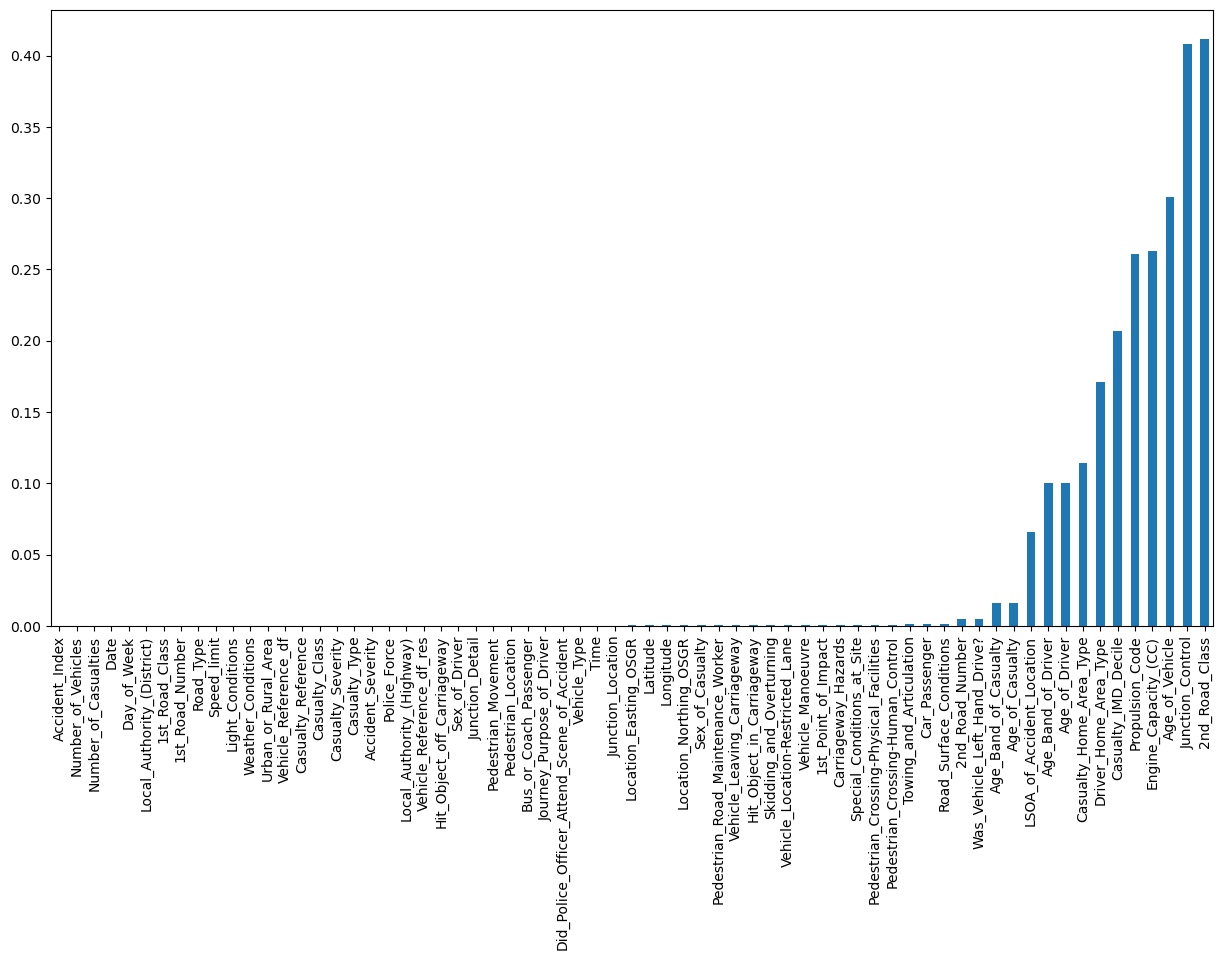

In [23]:
missing = acc.isna().mean().sort_values()
missing.plot(kind='bar', figsize=(15, 8))
plt.show()

In [28]:
acc_copy = acc.copy()

threshhold = acc.shape[0] * 0.85

acc_copy.dropna(thresh=threshhold, axis=1, inplace=True)
acc_copy.info()

acc = acc_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319790 entries, 0 to 319789
Data columns (total 60 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               319790 non-null  object 
 1   Vehicle_Reference_df_res                     319790 non-null  float64
 2   Vehicle_Type                                 319746 non-null  float64
 3   Towing_and_Articulation                      319476 non-null  float64
 4   Vehicle_Manoeuvre                            319673 non-null  float64
 5   Vehicle_Location-Restricted_Lane             319678 non-null  float64
 6   Junction_Location                            319731 non-null  float64
 7   Skidding_and_Overturning                     319685 non-null  float64
 8   Hit_Object_in_Carriageway                    319694 non-null  float64
 9   Vehicle_Leaving_Carriageway                  319697 non-nul

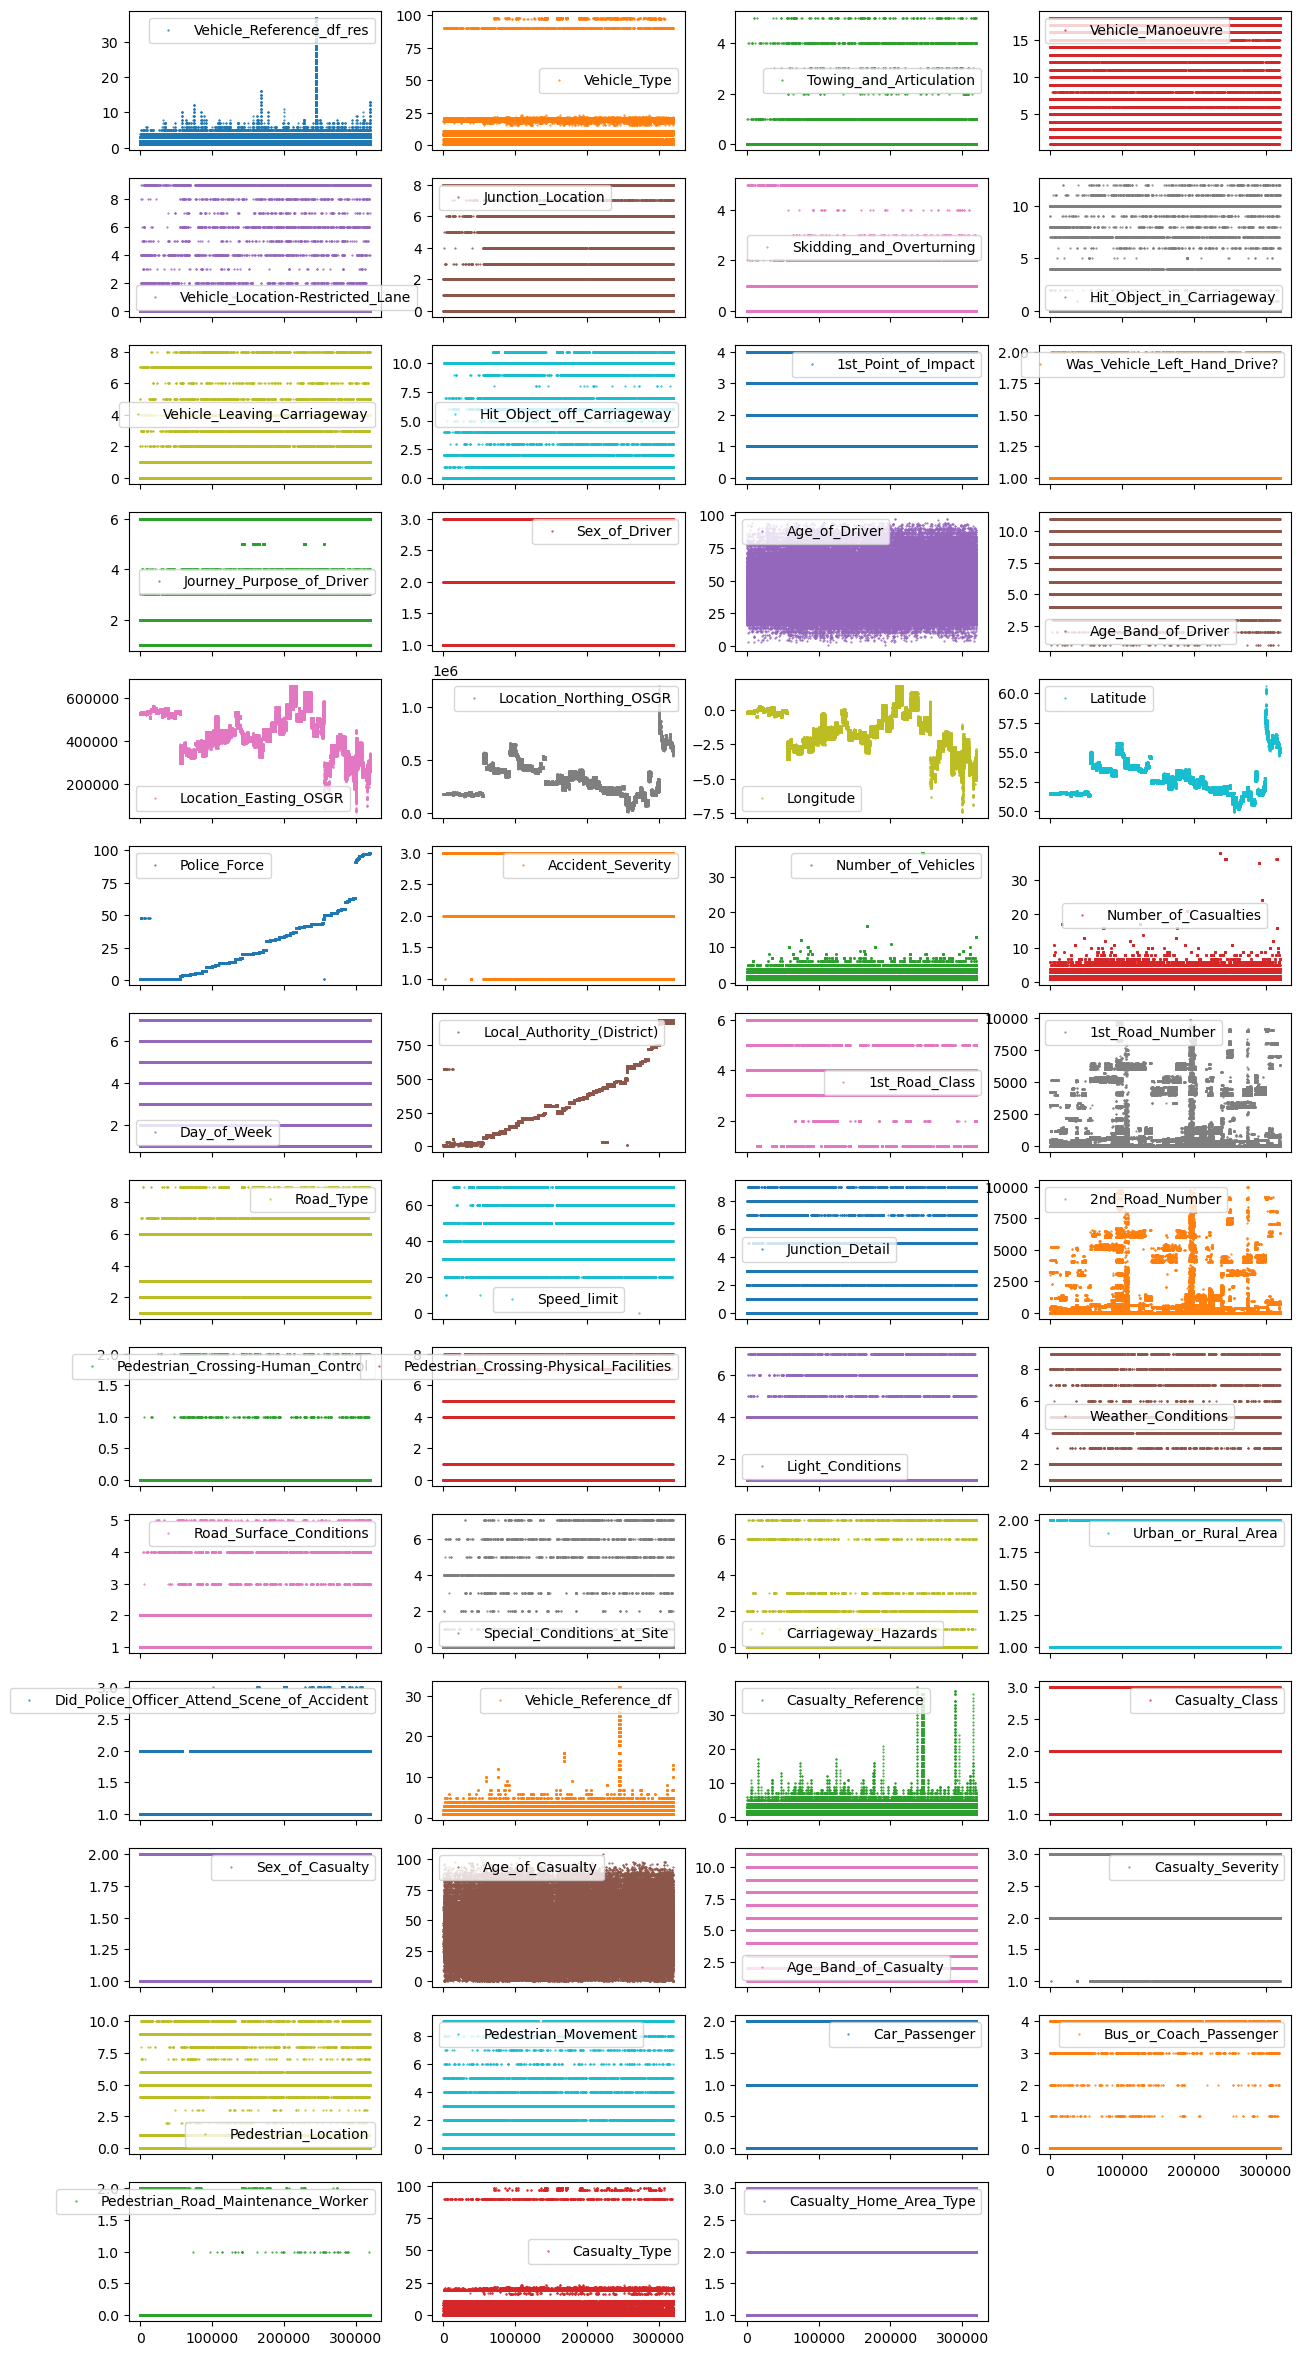

In [31]:
acc.plot(lw=0, marker='.', markersize=1, subplots=True, layout=(-1, 4), figsize=(15, 30))
plt.show()

In [32]:
acc.describe(exclude=['number'])

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          319790      319790  319746                    319790   
unique         123645         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2969                      8457   

       LSOA_of_Accident_Location  
count                     298693  
unique                     25977  
top                    E01028497  
freq                        1456

In [33]:
non_num_data = acc[['Accident_Index', 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location']]
non_num_data.head()

Accident_Index Local_Authority_(Highway) LSOA_of_Accident_Location
0  201501BS70001                 E09000020                 E01002825
1  201501BS70002                 E09000020                 E01002820
2  201501BS70004                 E09000020                 E01002833
3  201501BS70005                 E09000020                 E01002874
4  201501BS70008                 E09000020                 E01002814

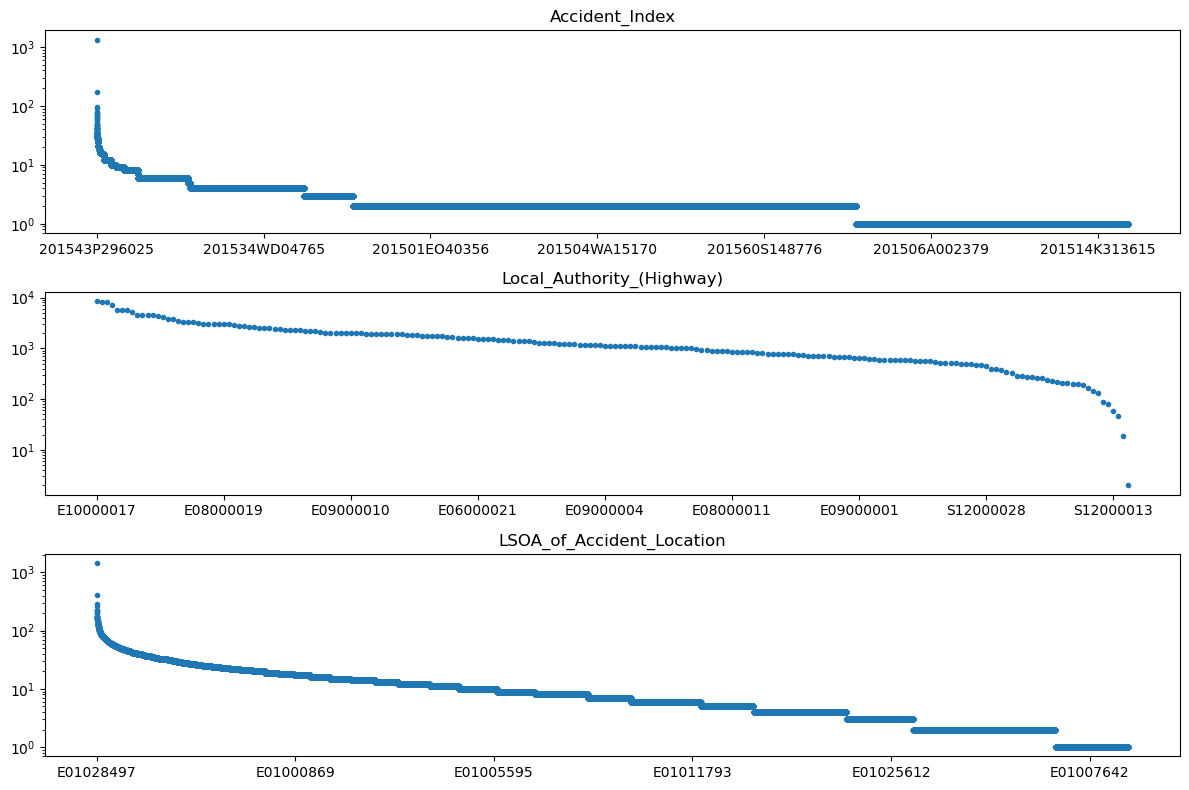

In [36]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

for col, ax in zip(non_num_data.columns, axes.ravel()):
    non_num_data[col].value_counts().plot(title=col, lw=0, marker='.', ax=ax, logy=True)
    
plt.tight_layout()
plt.show()

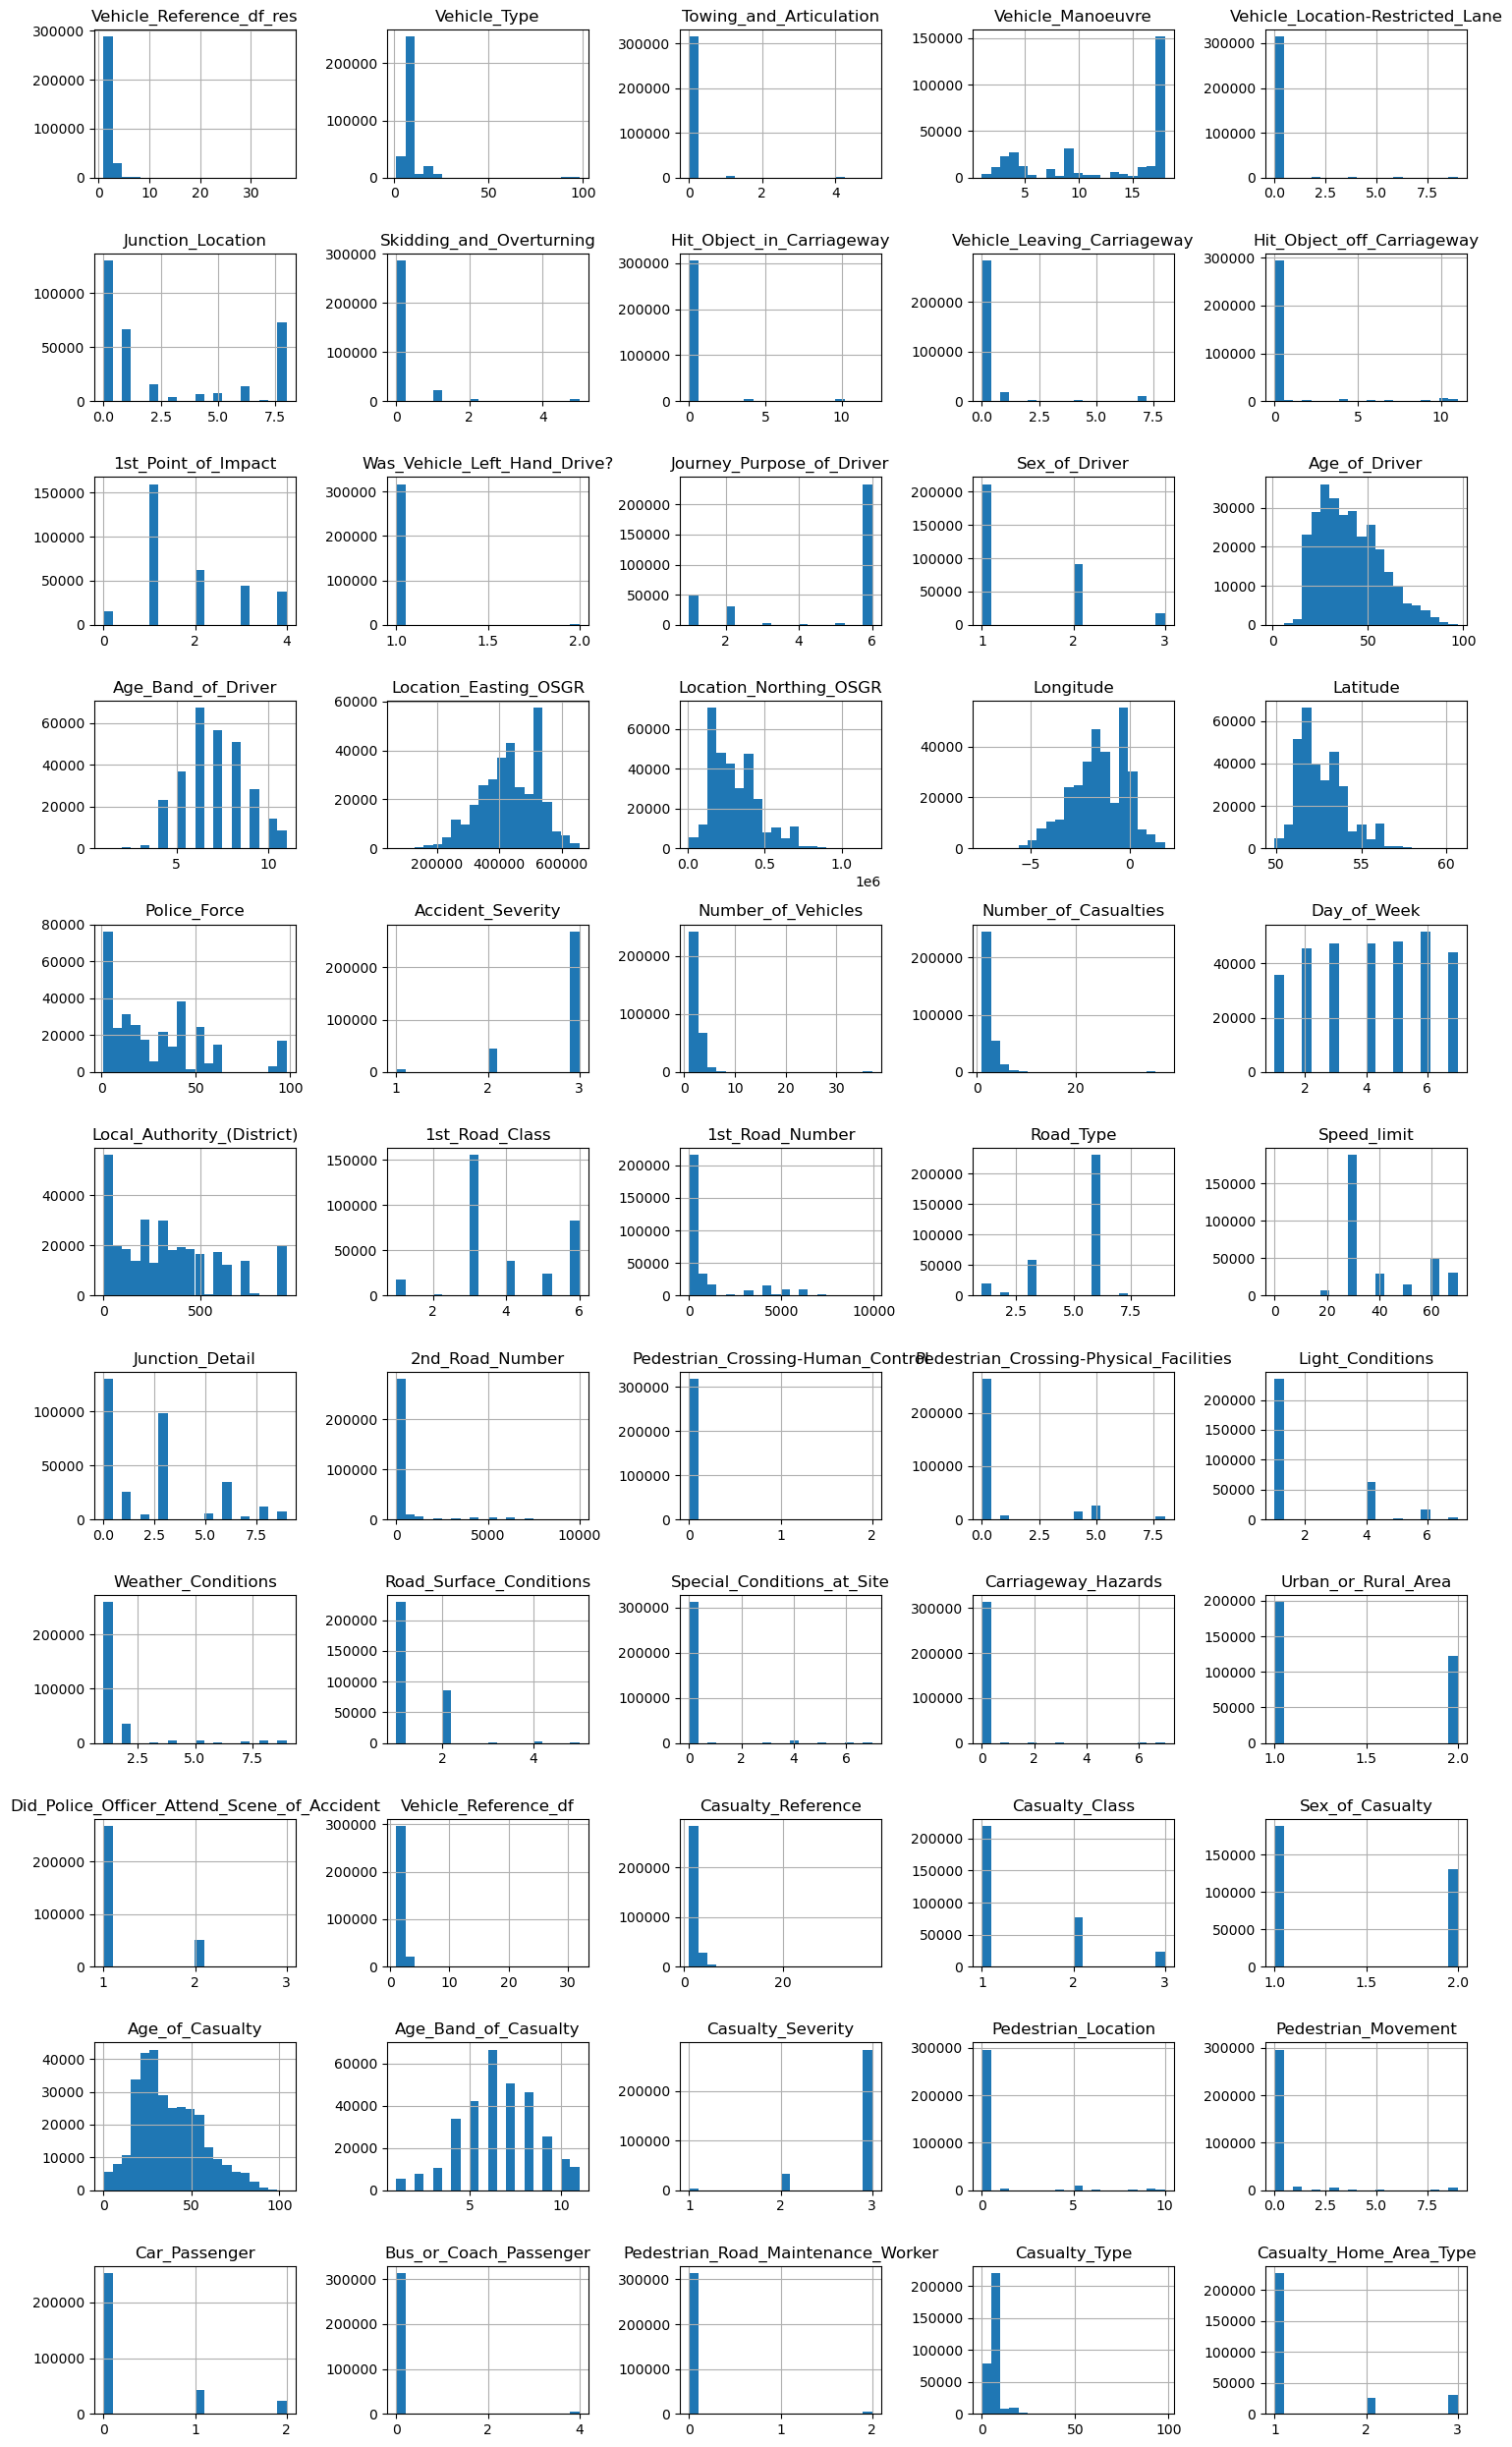

In [38]:
acc.hist(bins=20, figsize=(15, 25), layout=(-1, 5))
plt.tight_layout()
plt.show()

In [39]:
modes = acc.mode()
modes

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
0  201543P296025                       1.0           9.0   

   Towing_and_Articulation  Vehicle_Manoeuvre  \
0                      0.0               18.0   

   Vehicle_Location-Restricted_Lane  Junction_Location  \
0                               0.0                0.0   

   Skidding_and_Overturning  Hit_Object_in_Carriageway  \
0                       0.0                        0.0   

   Vehicle_Leaving_Carriageway  ...  Age_of_Casualty  Age_Band_of_Casualty  \
0                          0.0  ...             25.0                   6.0   

   Casualty_Severity  Pedestrian_Location  Pedestrian_Movement  Car_Passenger  \
0                3.0                  0.0                  0.0            0.0   

   Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
0                     0.0                                 0.0            9.0   

   Casualty_Home_Area_Type  
0                      1.0  

[1 rows x 60 columns]

In [41]:
continuous = acc.select_dtypes(include='number').nunique() >= 25
continuous

Vehicle_Reference_df_res                        True
Vehicle_Type                                   False
Towing_and_Articulation                        False
Vehicle_Manoeuvre                              False
Vehicle_Location-Restricted_Lane               False
Junction_Location                              False
Skidding_and_Overturning                       False
Hit_Object_in_Carriageway                      False
Vehicle_Leaving_Carriageway                    False
Hit_Object_off_Carriageway                     False
1st_Point_of_Impact                            False
Was_Vehicle_Left_Hand_Drive?                   False
Journey_Purpose_of_Driver                      False
Sex_of_Driver                                  False
Age_of_Driver                                   True
Age_Band_of_Driver                             False
Location_Easting_OSGR                           True
Location_Northing_OSGR                          True
Longitude                                     

In [45]:
df_cont = acc[continuous[continuous].index]
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319790 entries, 0 to 319789
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Vehicle_Reference_df_res    319790 non-null  float64
 1   Age_of_Driver               287764 non-null  float64
 2   Location_Easting_OSGR       319727 non-null  float64
 3   Location_Northing_OSGR      319727 non-null  float64
 4   Longitude                   319727 non-null  float64
 5   Latitude                    319727 non-null  float64
 6   Police_Force                319790 non-null  float64
 7   Local_Authority_(District)  319790 non-null  float64
 8   1st_Road_Number             319790 non-null  float64
 9   2nd_Road_Number             318340 non-null  float64
 10  Vehicle_Reference_df        319790 non-null  float64
 11  Casualty_Reference          319790 non-null  float64
 12  Age_of_Casualty             314752 non-null  float64
dtypes: float64(13)

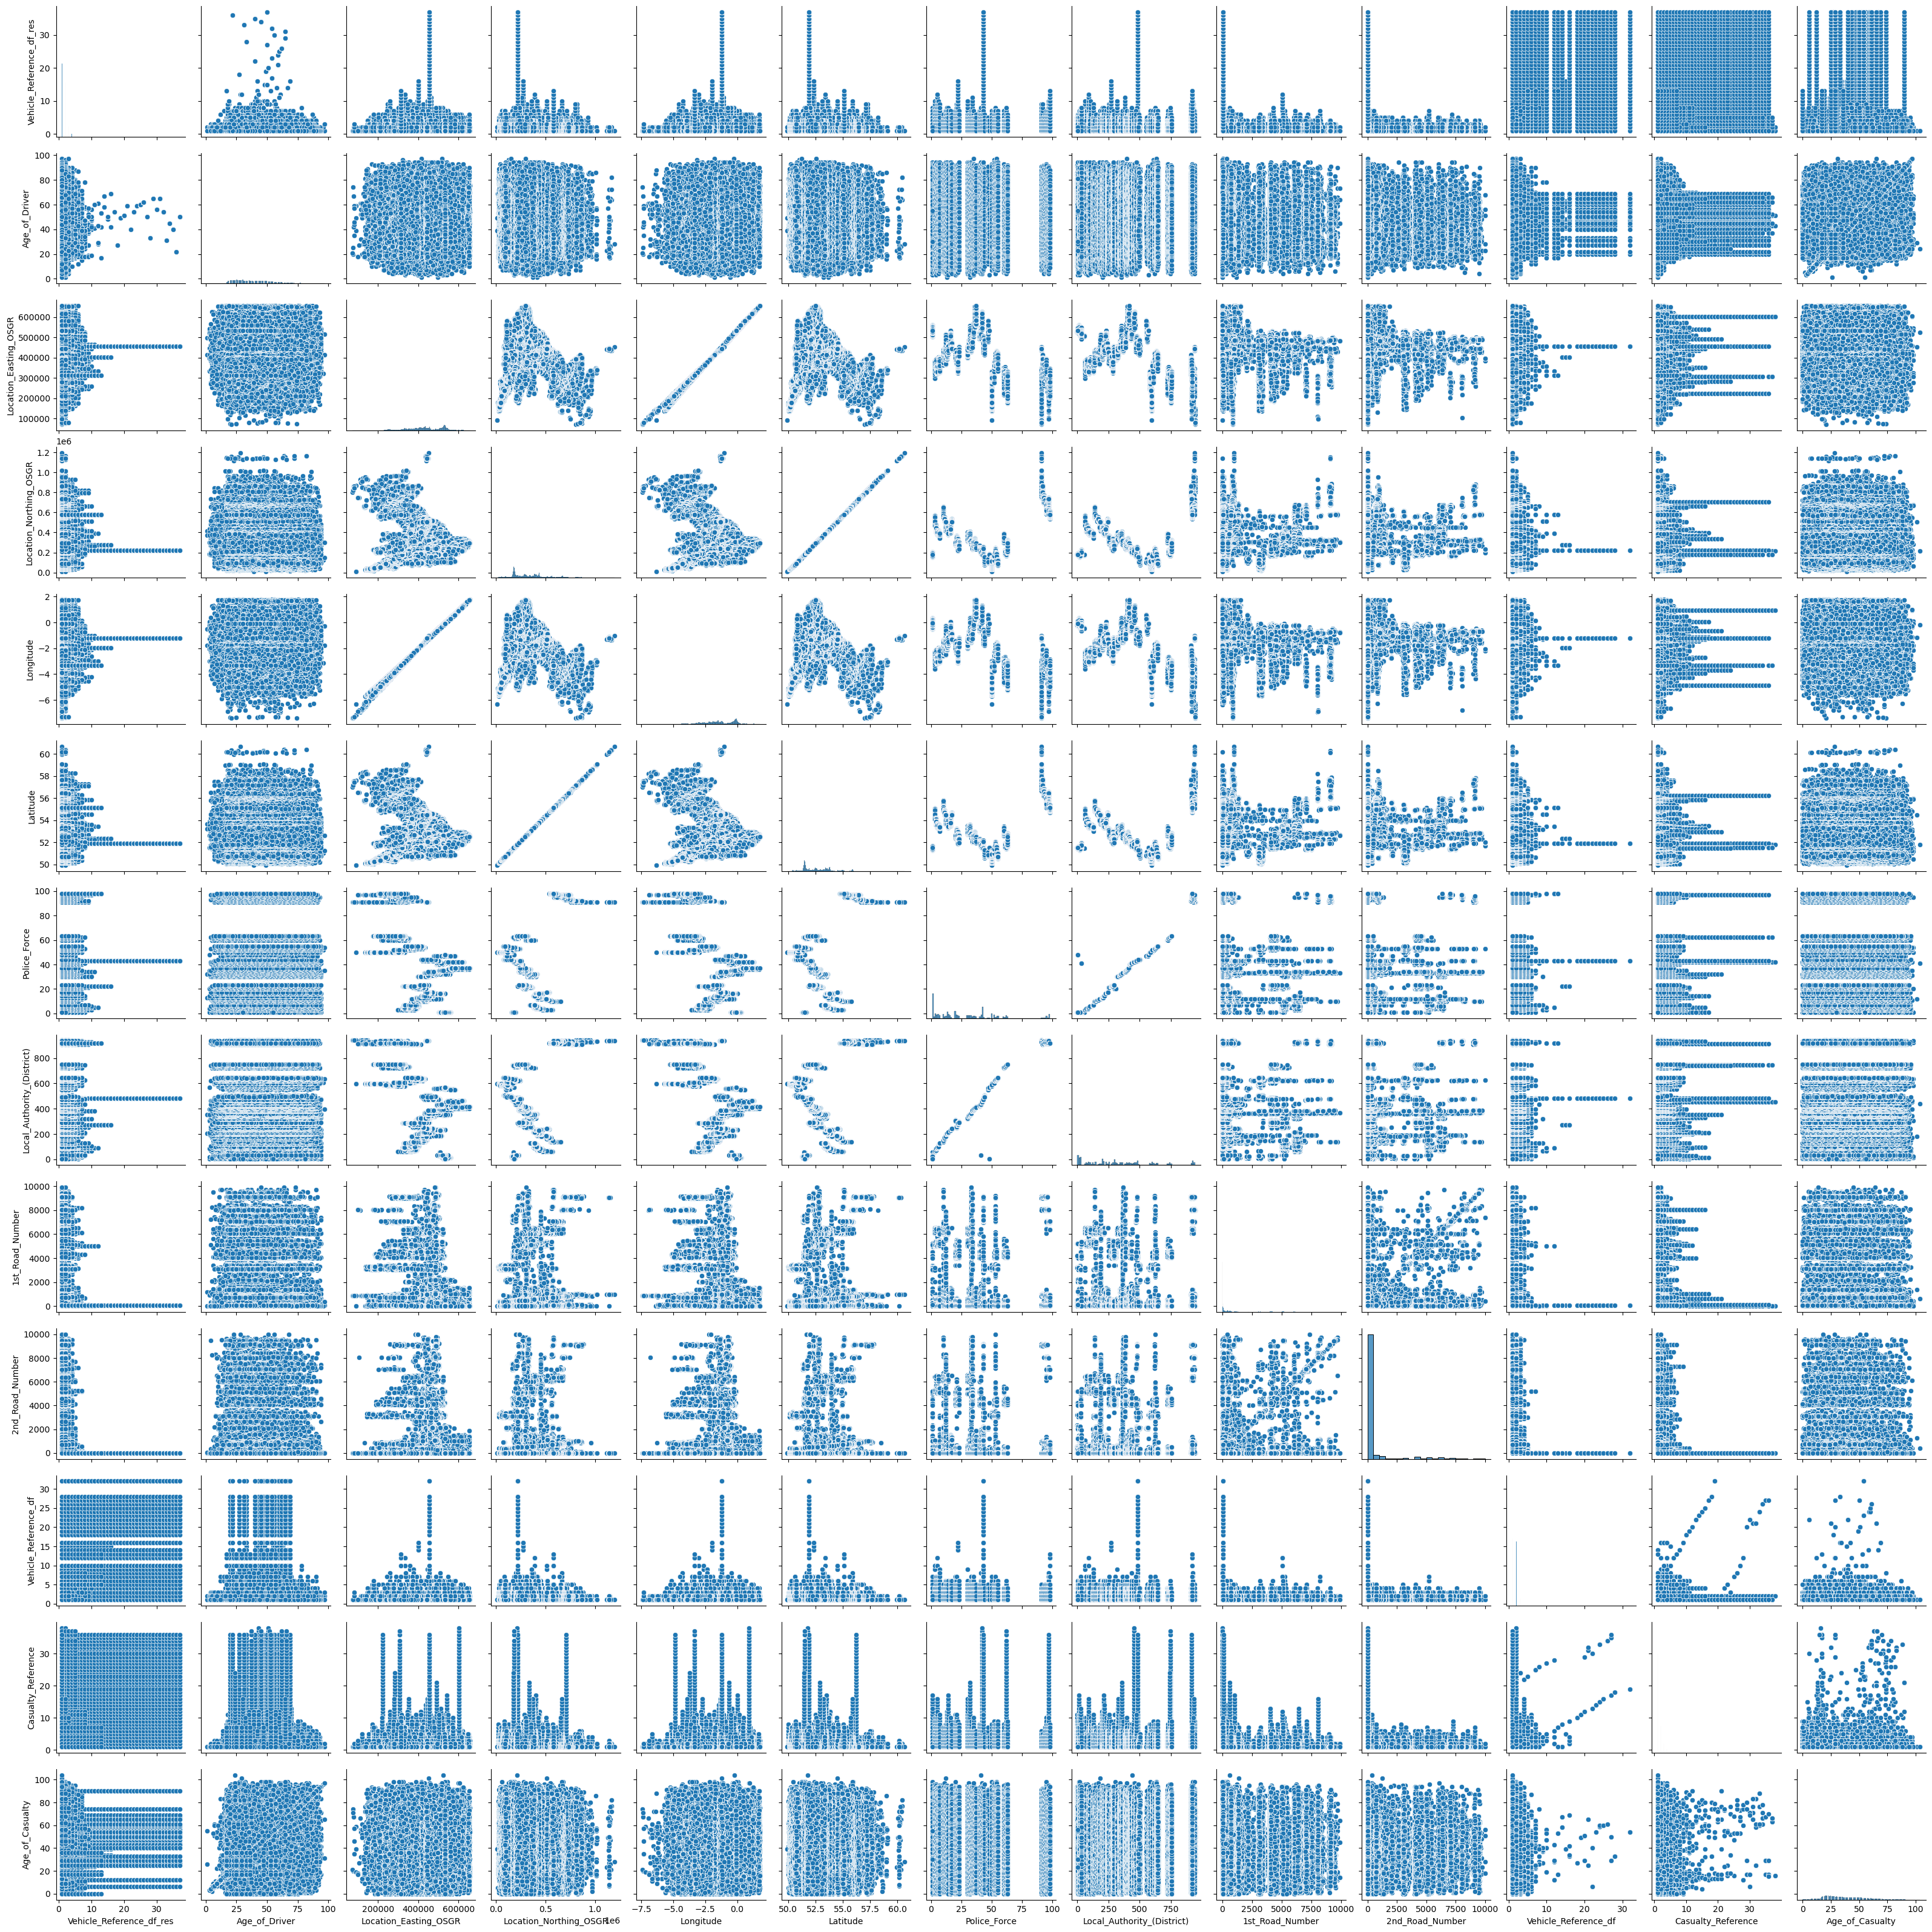

In [46]:
sns.pairplot(df_cont)
plt.show()

<Figure size 1500x800 with 0 Axes>

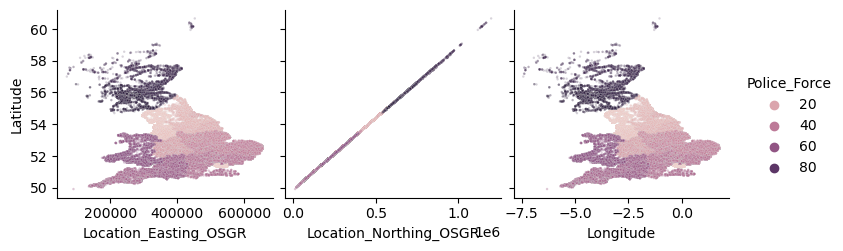

In [50]:
fig = plt.figure(figsize=(15, 8))
sns.pairplot(acc, plot_kws={'s':3, 'alpha':0.2}, x_vars=['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude'],
             y_vars='Latitude', hue='Police_Force')
plt.show()